In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import dissipation as dis
import scipy.special as sp
from scipy.optimize import  fsolve
import scipy.integrate as integrate
import matplotlib.colors as pltc

In [7]:
k_b = 1.380649*10**(-23) # J / K
h_bar = 1.054571*10**(-34) # J s
N_A = 6.022*10**(23)

In [41]:
TN_feps = 118 # K
J = TN_feps*k_b*np.log(2+np.sqrt(3))/2 # J
mu_0 = 4*np.pi*10**(-7) # T m / A
H_E_feps = 69/mu_0 # A / m
H_A_feps = 138/mu_0 # A / m
a_feps = 2*(5.94 + 10)/2 * 10**(-10) # we take the lattice parameter as average of the two (assuming square lattice instead of rectangular)
J_feps = 2
g_feps = 4.54
n_feps = 2.22*10**27
v_feps = 3823

radius = 5*10**-6
thickness = 45*10**-9

mu = 5
E = 103*10**9
nu = 0.304
rho_=3375
tension_buck = 14.682*E*thickness**3/(12*(1-nu**2)*radius**2)

In [15]:
T1 = np.linspace(5, 116, num=117-5).astype(int)
T2 = np.linspace(117, 117.9, num=5)
T3 = np.linspace(118.1, 119, num=5)
T4 = np.linspace(120, 200, num=201-120).astype(int)
T = np.concatenate((T1, T2, np.array([TN_feps]), T3, T4))

c_V = np.loadtxt('data/c_V_calculated.csv', delimiter=',')
c_v_=c_V*(1000/183)

data_kappa_log = np.genfromtxt(r"data/kappa_feps3_log.csv", delimiter=' ')
T_kappa_log = data_kappa_log[:, 0]
kappa_log = data_kappa_log[:, 1]
kappa = np.interp(T, T_kappa_log, kappa_log)

data_alfa_fe = np.genfromtxt(r"data/alpha_feps3.csv", delimiter=' ')
T_alfa_fe = data_alfa_fe[:, 0]
alfa_fe = data_alfa_fe[:, 1]
alfa_FE = np.interp(T,T_alfa_fe,alfa_fe)*3*10**(-5)

alpha =  np.genfromtxt(r"data/alpha_calculated.csv", delimiter=' ')

In [16]:
data = np.genfromtxt(r"data/dissipation_feps3.csv", delimiter=' ')
T_data = data[:, 0]
diss_data = data[:, 1]

data_f = np.genfromtxt(r"data/res_freq_feps3.csv", delimiter=' ')
T_data_f = data_f[:, 0]
freq_data_f = data_f[:, 1]*10**6
f0 = np.interp(T, T_data_f, freq_data_f)
w0 = 2*np.pi*f0

## Resonant Frequency
We make here the necessary computations of the tension in the membrane to calculate the resonant frequency as a function of temperature

In [25]:
data_f = np.genfromtxt(r"data/alpha_si.csv", delimiter=' ')
T_data_alpha_si = data_f[:, 0]
data_alpha_si = data_f[:, 1]*10**-5

alfa_si = np.interp (T, T_data_alpha_si, data_alpha_si)
alpha_fesi = alpha - alfa_si

def alpha_funct(temper):
    return np.interp(temper,T, alpha/3)

def alpha_fesi_funct(temper):
    return np.interp(temper,T, alpha_fesi/3)

In [42]:
T1 = np.linspace(5, 108, num=109-5).astype(int)
T2 = np.linspace(110, 128, num=50)
T3 = np.linspace(128, 200, num=(201-128)).astype(int)
T_integrate = np.concatenate((T1, T2, T3))
integral_alpha = []
for t in T_integrate:
    integral_alpha.append(-integrate.quad(alpha_funct, t, T[-1])[0])
integral_alpha = np.array(integral_alpha)
np.savetxt('integral_alpha.csv', integral_alpha, delimiter=',')
np.savetxt('T_integral_alpha.csv', T_integrate, delimiter=',')

C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_28980\2698966372.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_alpha.append(-integrate.quad(alpha_funct, t, T[-1])[0])
C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_28980\2698966372.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_alpha.append(-integrate.quad(alpha_funct, t, T[-1])[0])


In [43]:
integral_alpha = []
for t in T_integrate:
    integral_alpha.append(-integrate.quad(alpha_funct, t, T[-1])[0])
integral_alpha = np.array(integral_alpha)
tension_mp = -E*thickness/(1-nu)*integral_alpha
integral_alpha = []
for t in T_integrate:
    integral_alpha.append(-integrate.quad(alpha_fesi_funct, t, T[-1])[0])
integral_alpha = np.array(integral_alpha)
tension_fesi = -E*thickness/(1-nu)*integral_alpha

C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_28980\4087703662.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_alpha.append(-integrate.quad(alpha_funct, t, T[-1])[0])
C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_28980\4087703662.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_alpha.append(-integrate.quad(alpha_funct, t, T[-1])[0])
C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_28980\4087703662.py:8: IntegrationWarn

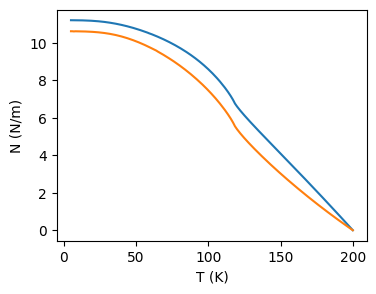

In [44]:
def tension_thick(integral_alpha, thickness, E, nu):
    return -E*thickness/(1-nu)*integral_alpha


fig, ax = plt.subplots(1,1, figsize=(4,3))
ax.plot(T_integrate, tension_mp, label=r'$\alpha$ ($FePS_3$)')
ax.plot(T_integrate, tension_fesi, label=r'$\alpha$ ($FePS_3$-Si)')
ax.set_ylabel('N (N/m)')
ax.set_xlabel('T (K)')
plt.savefig(r'figures/tension.pdf', bbox_inches='tight')
plt.show()


In [45]:
def system_ab(x, D, a, F):
    alpha, beta = x[0], x[1]
    return [alpha * sp.jv(1, alpha) / sp.jv(0, alpha) + beta * sp.iv(1, beta) / sp.iv(0, beta),
            beta ** 2 - alpha ** 2 - a**2*F/D]

def alpha_beta(D, h, a, F):
    F = np.array(F)
    if F.size == 1:
        params = fsolve(system_ab, [3, 4], maxfev=10000, args=(D, a, f))
        return params
    else:
        alpha = []
        beta = []
        for f in F:
            params = fsolve(system_ab, [2.5, 20], maxfev=10000, args=(D, a, f))
            alpha.append(params[0])
            beta.append(params[1])
        return np.array(alpha), np.array(beta)

def omega_tension_pl(thickness, radius, nu, E, rho, tension):
    D = E * thickness ** 3 / (12 * (1 - nu**2))
    alpha, beta = alpha_beta(D, thickness, radius, tension)
    omega = np.sqrt(D / (rho * thickness)) / (2 * radius ** 2) * np.sqrt(
        (alpha ** 2 + beta ** 2) ** 2 - (radius ** 2 * tension / D) ** 2)
    return omega
def omega_tension_mem(thickness, radius, rho, tension):
    return 2.4048/(radius)*np.sqrt(tension/(rho*thickness))


In [51]:
pretension_mem = 8.4
pretension_pl = 6.85
tension = tension_fesi
h = 45*10**-9
a = 5*10**-6

omega_pl = omega_tension_pl(h, a, nu, E, rho_, tension)
omega_pl_pretension = omega_tension_pl(h, a, nu, E, rho_, tension + pretension_pl)
omega_pl_notension = omega_tension_pl(h, a, nu, E, rho_, np.zeros_like(tension))

omega_mem = omega_tension_mem(h, a, rho_, tension)
omega_mem_pretension = omega_tension_mem(h, a, rho_, tension + pretension_mem)
data_f = np.genfromtxt(r"data/res_freq_feps3.csv", delimiter=' ')
T_data_f = data_f[:, 0]
freq_data_f = data_f[:, 1]*10**6
T_interp = np.linspace(5, 200, 40)
f0 = np.interp(T_interp, T_data_f, freq_data_f)
w0 = 2*np.pi*f0

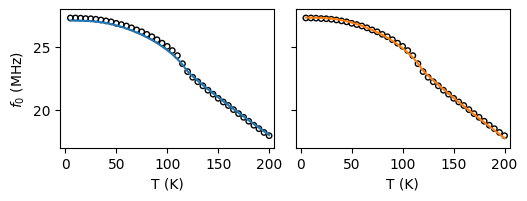

In [52]:
fig, ax = plt.subplots(1,2, figsize=(5.8,1.8),sharey=True)
#ax.plot(T_integrate, omega_mem, label=r'$\omega$ model membrane')
ax[0].plot(T_integrate, omega_mem_pretension*(10**-6)/(2*np.pi))
ax[0].scatter(T_interp,w0*(10**-6)/(2*np.pi), marker='o', s=15, facecolor='none',edgecolor='k')
ax[0].set_ylabel('$f_0$ (MHz)')
ax[0].set_xlabel('T (K)')
ax[0].set_xlim(-5,205)
#ax[0].set_ylim(17.5,28)

ax[1].plot(1, 1)
ax[1].plot(T_integrate, omega_pl_pretension*(10**-6)/(2*np.pi), label=r'$\omega$ plate mod.')
ax[1].scatter(T_interp,w0*(10**-6)/(2*np.pi),marker='o', s=15, facecolor='none',edgecolor='k', label='exp makars')
#ax[1].legend()
ax[1].set_xlabel('T (K)')
ax[1].set_xlim(-5,205)
ax[1].set_ylim(17,28)

plt.subplots_adjust(wspace=0.1, hspace=0)
plt.savefig(r'figures/f0_makars.pdf', bbox_inches='tight')
plt.show()

## Thermal time constant

Text(0.5, 0.98, 'Thermal time constants')

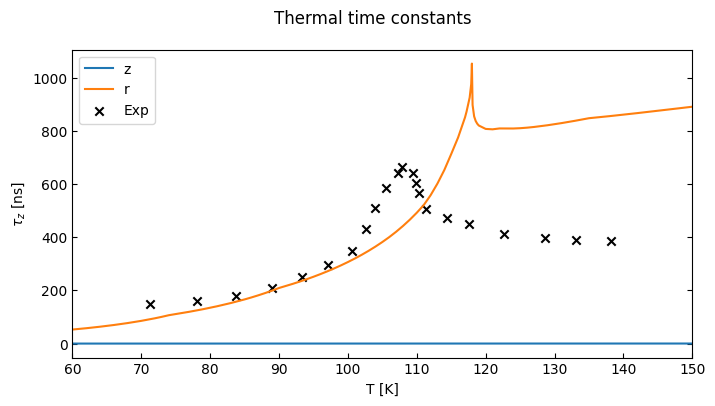

In [77]:
data_tau = np.genfromtxt(r"data/tau_feps3.csv", delimiter=' ')
T_data_tau = data_tau[:, 0]
tau_data = data_tau[:, 1]
tau_data_interp = np.interp(T, T_data_tau, tau_data)*10**-9
fig, ax = plt.subplots(1,1, sharex=True, figsize=(8,4))
difuss = kappa / (rho_*c_v_)
tau_z = thickness**2/(difuss*np.pi)
tau_r = a**2/(difuss*10)
ax.plot(T, tau_z*10**9, label='z')
ax.plot(T, tau_r*10**9,label='r')
ax.scatter(T_data_tau, tau_data, marker='x', c='k', label='Exp')
ax.legend()
#ax.set_yscale('log')
ax.set_ylabel(r'$\tau_{z}$ [ns]')
ax.set_xlabel('T [K]')
ax.tick_params(direction='in', right=True, left=True, bottom=True)
ax.legend()
ax.set_xlim(60,150)
fig.suptitle('Thermal time constants')

Text(0.5, 0.98, 'Thermal time constants')

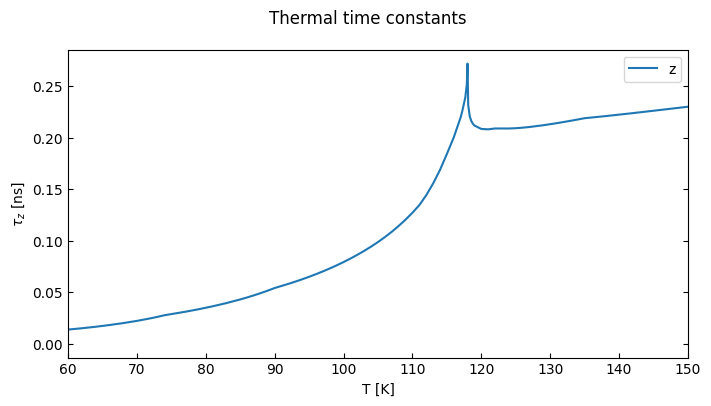

In [78]:
fig, ax = plt.subplots(1,1, sharex=True, figsize=(8,4))
difuss = kappa / (rho_*c_v_)
tau_z = thickness**2/(difuss*np.pi)
tau_r = a**2/(difuss*10)
ax.plot(T, tau_z*10**9, label='z')
ax.legend()
#ax.set_yscale('log')
ax.set_ylabel(r'$\tau_{z}$ [ns]')
ax.set_xlabel('T [K]')
ax.tick_params(direction='in', right=True, left=True, bottom=True)
ax.legend()
ax.set_xlim(60,150)
fig.suptitle('Thermal time constants')

Text(0.5, 0.98, 'Thermal time constants')

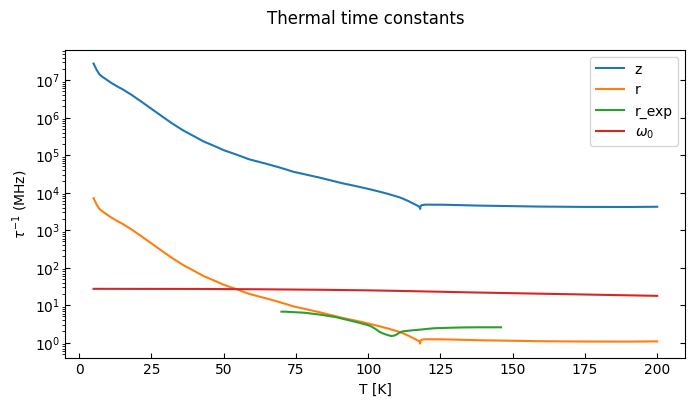

In [82]:
fig, ax = plt.subplots(1,1, sharex=True, figsize=(8,4))
difuss = kappa / (rho_*c_v_)
tau_z = thickness**2/(difuss*np.pi)
tau_r = a**2/(difuss*10)
ax.plot(T, tau_z**-1/10**6, label='z')
ax.plot(T, tau_r**-1/10**6,label='r')
ax.plot(T[65:150], tau_data_interp[65:150]**-1/10**6,label='r_exp')
ax.plot(T_integrate, omega_pl_pretension*(10**-6)/(2*np.pi), label=r'$f_0$')
ax.legend()
ax.set_ylabel(r'$\tau^{-1}$ (MHz)')
ax.set_xlabel('T [K]')
ax.tick_params(direction='in', right=True, left=True, bottom=True)
ax.legend()
ax.set_yscale('log')
fig.suptitle('Thermal time constants')

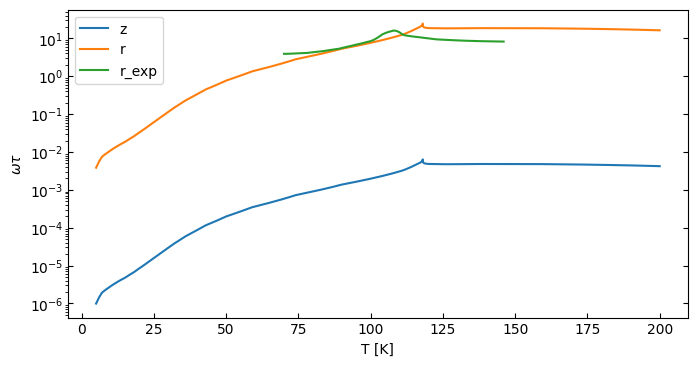

In [90]:
fig, ax = plt.subplots(1,1, sharex=True, figsize=(8,4))
difuss = kappa / (rho_*c_v_)
tau_z = thickness**2/(difuss*np.pi)
tau_r = a**2/(difuss*10)
omega = np.interp(T, T_integrate, omega_pl_pretension)
ax.plot(T, tau_z*omega/(2*np.pi), label='z')
ax.plot(T, tau_r*omega/(2*np.pi),label='r')
ax.plot(T[65:150], tau_data_interp[65:150]* omega[65:150]/(2*np.pi),label='r_exp')
ax.legend()
ax.set_ylabel(r'$\omega\tau$')
ax.set_xlabel('T [K]')
ax.tick_params(direction='in', right=True, left=True, bottom=True)
ax.legend()
ax.set_yscale('log')
plt.show()

Here we start computing the dissipation

In [17]:
r = 5*10**(-6)
mu = 5
nu = 0.304
E = 103*10**9
rho_=3375
c_v_=c_V*(1000/183)


Q_rz = dis.dissipation_kz_kr(thickness, r, nu, E, rho_, T, c_v_, kappa, alpha, w0, 200)
Q_what = dis.dissipation_kz_kr(thickness,r, nu, E, rho_, T, c_v_, kappa, alpha, w0, 200)

In [18]:
#Anisotropic calculations
Q_rz_anis = dis.dissipation_kz_kr_anis(thickness, r, nu, E, rho_, T, c_v_, kappa/4, kappa, alpha, w0,200) 
Q_rz_anis_2 = dis.dissipation_kz_kr_anis(thickness, r, nu, E, rho_, T, c_v_, kappa/10, kappa, alpha, w0,200) 
Q_rz_anis_3 = dis.dissipation_kz_kr_anis(thickness, r, nu, E, rho_, T, c_v_, kappa/20, kappa, alpha, w0,200) 
Q_rz_anis_4 = dis.dissipation_kz_kr_anis(thickness, r, nu, E, rho_, T, c_v_, kappa/300, kappa, alpha, w0,200) 
Q_rz_anis_4 = dis.dissipation_kz_kr_anis(thickness, r, nu, E, rho_, T, c_v_, kappa/10000, kappa, alpha, w0,200) 
Q_rz_anis_5 = dis.dissipation_kz_kr_anis(thickness, r, nu, E, rho_, T, c_v_, kappa, kappa/50000, alpha, w0,200) 

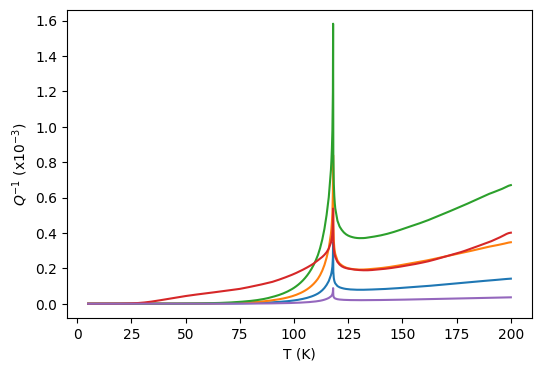

In [92]:
cmap = plt.get_cmap('viridis')
norm = pltc.Normalize(vmin=f_kr_kz[0], vmax=1/f_kr_kz[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig, ax = plt.subplots(1,1,figsize=(6,4), sharey=True)
ax.plot(T,Q_rz_anis*1000)
ax.plot(T,Q_rz_anis_2*1000)
ax.plot(T,Q_rz_anis_3*1000)
ax.plot(T,Q_rz_anis_4*1000)
ax.plot(T,Q_rz_anis_5*1000)
ax.set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax.set_xlabel('T (K)')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

In [19]:
Q_RZ_ANISOTROPIC = []
f_kr_kz = []
for i in range(20):
    f = 1 / (2*i**2+1)
    f_kr_kz.append(f)
    Q_RZ_ANISOTROPIC.append(dis.dissipation_kz_kr_anis(thickness, r, nu, E, rho_, T, c_v_, kappa*f, kappa, alpha, w0,200))

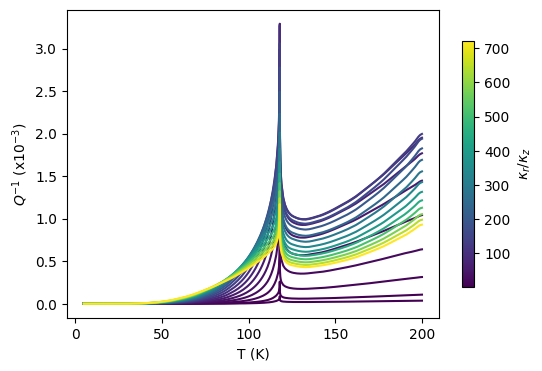

In [20]:
cmap = plt.get_cmap('viridis')
norm = pltc.Normalize(vmin=f_kr_kz[0], vmax=1/f_kr_kz[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig, ax = plt.subplots(1,1,figsize=(6,4), sharey=True)
for i in range(20):
#ax.plot(T, Q_rz*1000,label='iso')
    ax.plot(T,Q_RZ_ANISOTROPIC[i]*1000, color=cmap(norm(1/f_kr_kz[i])))
#ax.scatter(T_data, diss_data*10**3,marker='o', s=25, facecolor='none',edgecolor='k')
ax.set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax.set_xlabel('T (K)')
cbar = fig.colorbar(sm, ax=ax, label=r'$\kappa_r/\kappa_z$', shrink=0.8)
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

NameError: name 'Q_z' is not defined

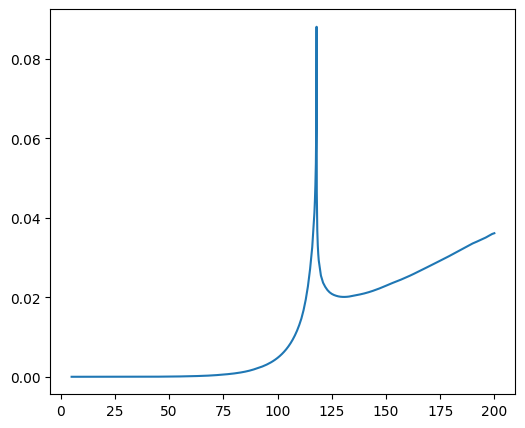

In [21]:
Q_anis_z = dis.dissipation_kz_kr_anis(thickness, r, nu, E, rho_, T, c_v_, kappa, kappa*0, alpha, w0, 200) 

fig, ax = plt.subplots(1,1,figsize=(6,5), sharey=True)
#ax.plot(T, Q_rz*1000,label='iso')
ax.plot(T, Q_anis_z*1000)
ax.plot(T, Q_z*1000)
ax.scatter(T_data, diss_data*10**3,marker='o', s=25, facecolor='none',edgecolor='k')
ax.set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax.set_xlabel('T (K)')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

Thesis results

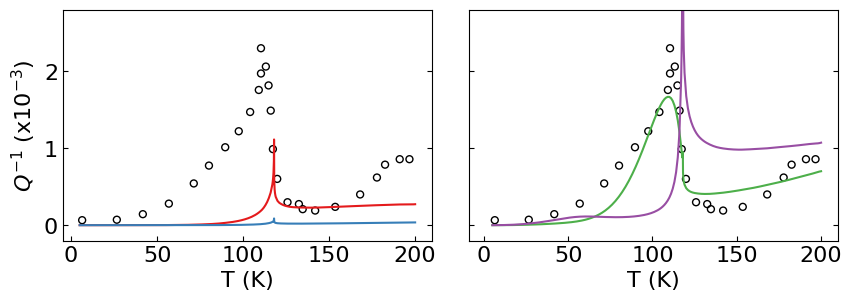

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,3), sharey=True)
ax[0].plot(T, Q_z*1000)
ax[0].plot(T, Q_rz*1000)
ax[1].plot(1,1)
ax[1].plot(1,1)
ax[1].set_ylim(-0.2,2.8)
ax[1].plot(T, Q_r*1000)
ax[1].plot(T, Q_z2*1000)
ax[0].scatter(T_data, diss_data*10**3,marker='o', s=25, facecolor='none',edgecolor='k')
ax[1].scatter(T_data, diss_data*10**3,marker='o', s=25, facecolor='none',edgecolor='k')
ax[0].set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax[0].set_xlabel('T (K)')
ax[1].set_xlabel('T (K)')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.savefig(r'C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\plots\FePS3\Qmak.pdf', bbox_inches='tight')
plt.show()

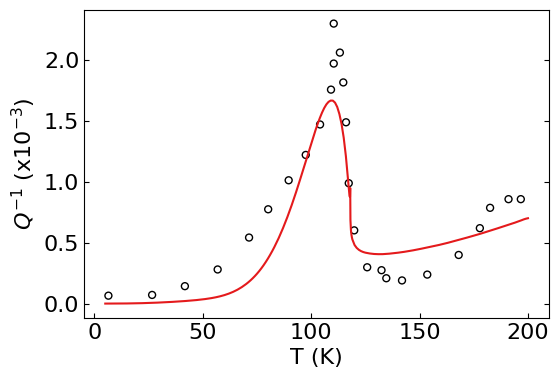

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(T, Q_r*1000)
ax.scatter(T_data, diss_data*10**3,marker='o', s=25, facecolor='none',edgecolor='k')
ax.set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax.set_xlabel('T (K)')
#plt.suptitle(r'Z model', fontsize=12)
plt.savefig(r'..\figures\dissipation_Zmod_compXiang.pdf')
plt.show()

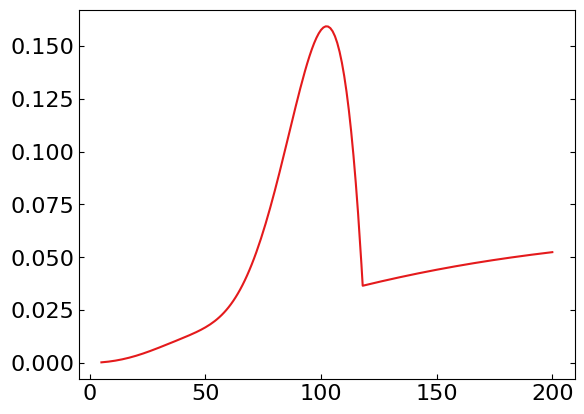

In [ ]:
kappa = (k_mag_vec[-1]/tau_mag_vec[-1]*(3*10**-9) + k_ph_vec [0])
plt.plot(T,kappa)

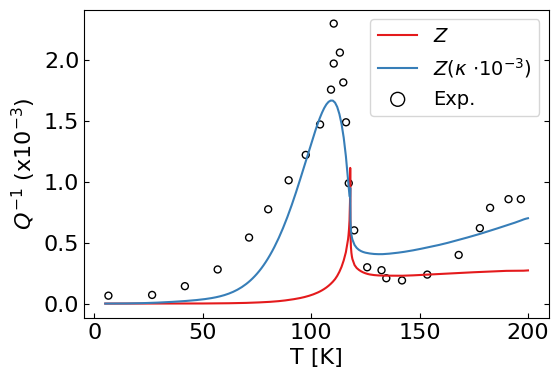

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6,4), dpi=100)
ax.plot(T, Q_z*1000, label=r'$Z$')
ax.plot(T, Q_r*1000, label=r'$Z (\kappa$ $\cdot10^{-3}$)')
ax.scatter(T_data, diss_data*10**3,marker='o', s=25, facecolor='none',edgecolor='k', label='Exp.')
ax.set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax.set_xlabel('T [K]')
ax.tick_params(direction='in', left=True, right=True, bottom=True)
ax.legend(loc='upper right',fontsize=14)
#plt.suptitle(r'Z model', fontsize=12)
plt.savefig(r'..\figures\dissipation_Zmod_compXiang.pdf')
plt.show()

Here we defined a function to fit the dissipation to the data so that we can get the right values of the quaiparticles lifetimes. Right now it's not working because I changed things but I should fix it.

In [ ]:
from scipy.optimize import curve_fit
def dissipation_fit(t, tau_ph, tau_mag):
    r = 5*10**(-6)
    mu = 5
    nu = 0.304
    E = 103*10**9
    kappa = k_mag_vec[-1]/tau_mag_vec[-1]*tau_mag + k_ph_vec[1]/tau_ph_vec[1]*tau_ph
    kappa = np.interp(t, T, kappa)
    c_V = c_cb + c_M
    c_V = np.interp(t, T, c_V)
    w0 = 2*np.pi*f0
    w0 = np.interp(t, T, w0)
    alpha = beta_T*rho*(gamma_E*c_cb + 4*gamma_E*(c_mag + c_is))
    alpha = np.interp(t, T, alpha)

    Xi_z = thickness * np.sqrt(w0*rho*c_V/(2*kappa))
    factor1 = (1 + nu)/(1 - nu)*E*alpha**2 * t/(rho*c_V)
    if max(Xi_z)<40:
        factor2_z = 6/Xi_z**2 - 6/Xi_z**3*(np.sinh(Xi_z)+np.sin(Xi_z))/(np.cosh(Xi_z) + np.cos(Xi_z))
    else: # approximation of the sinh and cosh if Xi values are too high.
        factor2_z = 6/Xi_z**2 - 6/Xi_z**3

    return factor1*factor2_z

params = curve_fit(dissipation_fit, T_data, diss_data, p0=[10**(-12),10**(-9)], bounds=[[0,0],[1*10**(-11),10**(-7)]])

C:\Users\alvar\AppData\Local\Temp\ipykernel_13956\790027430.py:16: RuntimeWarning: divide by zero encountered in divide
  Xi_z = thickness * np.sqrt(w0*rho*c_V/(2*kappa))


In [ ]:
dissipation_f = dissipation_fit(T, params[0][0],  params[0][1])

Here we plot the result according to the 1D heat conduction model for several values of magnon lifetimes and an adecuate phonon lifetime.

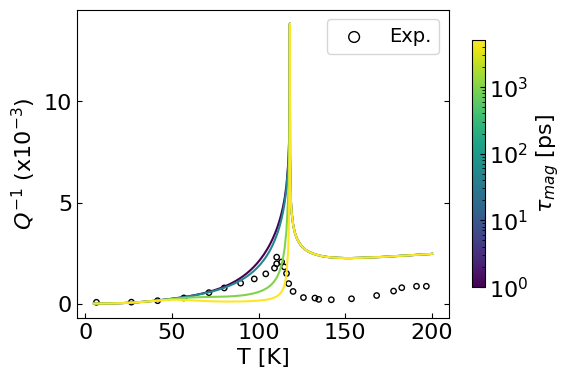

In [ ]:
tau_mag_vec = np.array([10**(-12), 0.5*10**(-10), 10**(-9), 0.5*10**(-8)])
tau_mag_vec_plot = tau_mag_vec*10**12
cmap = plt.get_cmap('viridis')
norm = pltc.LogNorm(vmin=tau_mag_vec_plot[0], vmax=tau_mag_vec_plot[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig, ax = plt.subplots(1,1,figsize=(6,4))
for i, tau in enumerate(tau_mag_vec):
    Q = dissipation_fit(T, 10*10**(-12), tau)
    ax.plot(T, Q*1000, color=cmap(norm(tau_mag_vec_plot[i])))

ax.scatter(T_data, diss_data*10**3,marker='o', s=15, facecolor='none',edgecolor='k', label='Exp.')
ax.set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax.set_xlabel('T [K]')
ax.tick_params(direction='in')
ax.legend(loc='upper right',fontsize=14)
cbar = fig.colorbar(sm, ax=ax, label=r'$\tau_{mag}$ [ps]', shrink=0.8)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

Here the same but just the dissipation for practical purposes.

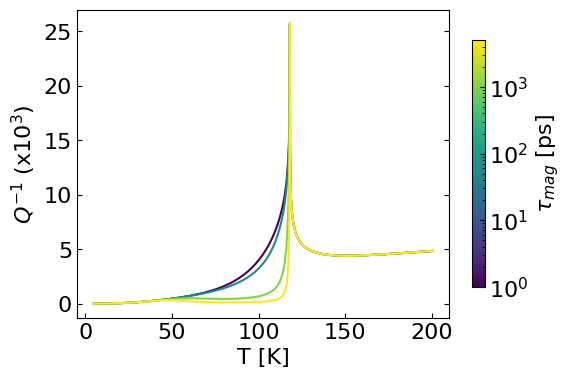

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
for i, tau in enumerate(tau_mag_vec):
    Q = dissipation_fit(T, 5*10**(-12), tau)
    ax.plot(T, Q*1000, color=cmap(norm(tau_mag_vec_plot[i])))

ax.set_ylabel(r'$Q^{-1}$ (x$10^3$)')
ax.set_xlabel('T [K]')
ax.tick_params(direction='in',left=True, bottom=True, right=True)
cbar = fig.colorbar(sm, ax=ax, label=r'$\tau_{mag}$ [ps]', shrink=0.8)
plt.savefig(r'..\figures\dissipation_Zmod_taumag_dep.pdf')
plt.show()

## Isotropic conduction in Z and R
We now introduce the dissipation model with isotropic heat conduction in both the z and r directions. This case is computed as a truncated sum of an infinite sum. Thus first we make an analysis of how many terms we should take.

In [ ]:
if False:
    kappa = k_mag_vec[-1] + k_ph_vec[1]
    w0 = np.array([-1])
    Qs = []
    for N in np.logspace(1, 4, 20, dtype=int):
        print(N)
        Q = dis.dissipation_kz_kr(thickness, r, nu, E, rho, T, c_V, kappa, alpha, w0, N)
        Qs.append(Q)

From the previous plot we conclude that 500 terms is enough. It gives a relative error with respect to $N=10^4$ of almost $10^{-5}$. With this we can compute the dissipation given by isotropic thermal model.

## Frequency given by the model

In [ ]:
c_v_ = c_V * (1000/183)

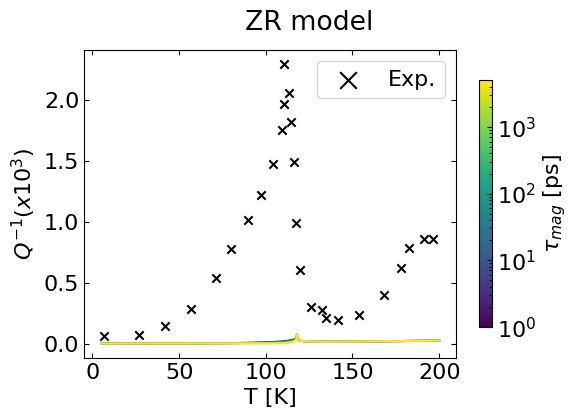

In [ ]:
cmap = plt.get_cmap('viridis')
norm = pltc.LogNorm(vmin=tau_mag_vec_plot[0], vmax=tau_mag_vec_plot[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig, ax = plt.subplots(1,1, figsize=(6,4))
for i, tau in enumerate(tau_mag_vec):
    kappa = k_mag_vec[i]+k_ph_vec[1]
    #kappa = kappa_fe_exp
    Q = dis.dissipation_kz_kr(thickness, r, nu, E, rho, T, c_v_, kappa, alpha, w0, 300)
    ax.plot(T, Q*1000,color=cmap(norm(tau_mag_vec_plot[i])))
ax.scatter(T_data, diss_data*1000,c='k',marker='x', label='Exp.')
ax.set_xlabel('T [K]')
ax.set_ylabel(r'$Q^{-1} (x10^3)$')
ax.tick_params(direction='in',right=True, top=True)
ax.legend()
cbar = fig.colorbar(sm, ax=ax, label=r'$\tau_{mag}$ [ps]', shrink=0.8)
plt.suptitle('ZR model')
plt.show()

## Frequency taken from the experiment

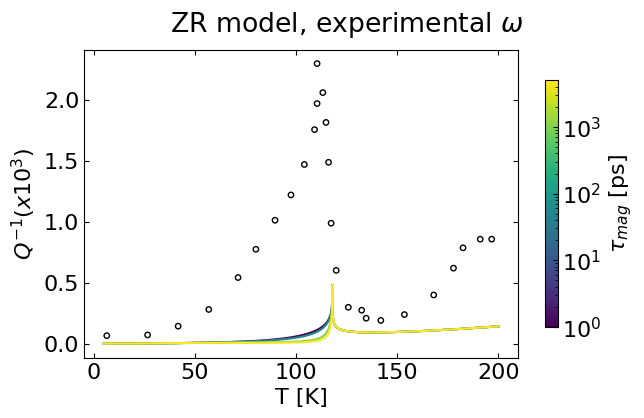

In [ ]:
data_f = np.genfromtxt(r"C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\data\FePS3\res_freq_feps3.csv", delimiter=' ')
T_data_f = data_f[:, 0]
freq_data_f = data_f[:, 1]*10**6
f0 = np.interp(T, T_data_f, freq_data_f)
w0 = 2*np.pi*f0
cmap = plt.get_cmap('viridis')
norm = pltc.LogNorm(vmin=tau_mag_vec_plot[0], vmax=tau_mag_vec_plot[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
rho_ = 3375

fig, ax = plt.subplots(1,1, figsize=(7,4))
for i, tau in enumerate(tau_mag_vec):
    kappa = k_mag_vec[i] + k_ph_vec[1]
    Q = dis.dissipation_kz_kr(thickness, r, nu, E, rho_, T, c_v_, kappa, alpha, w0, 500)
    ax.plot(T, Q*1000,color=cmap(norm(tau_mag_vec_plot[i])))
ax.scatter(T_data, diss_data*1000,marker='o', s=15, facecolor='none',edgecolor='k', label='Exp.')
ax.set_xlabel('T [K]')
ax.set_ylabel(r'$Q^{-1} (x10^3)$')
ax.tick_params(direction='in',right=True, top=True)
cbar = fig.colorbar(sm, ax=ax, label=r'$\tau_{mag}$ [ps]', shrink=0.8)
plt.suptitle('ZR model, experimental $\omega$')
plt.show()

In [ ]:
D = E * thickness ** 3 / (12 * (1 - 2 * nu))
alpha_form, beta_form = 3.19622, 3.19622
sqrt1 = np.sqrt(D / (rho * thickness))
w0_form = [(alpha_form**2 + beta_form**2)/(2*r**2)*sqrt1]*len(T)

## Code to compute $\alpha$ and $\beta$ from the isotropic heat conduction model

In [ ]:
rho = 3375
w = 10**11
E = 103*10**9
h = 45*10**(-9)
nu = 0.3
a = 5*10**(-6)
D = E*h**3/(12*(1-2*nu))
def weird_func(x):
    alpha, beta = x[0], x[1]
    return [alpha*sp.jv(1,alpha)/sp.jv(0,alpha) + beta*sp.iv(1,beta)/sp.iv(0,beta), beta**2-alpha**2-2*14.628]
fsolve(weird_func, [3,4], maxfev=10000 )

array([2.84075031, 6.10948953])

# Tasks
* Plot the thermal time constants for both directions and compare. Look at the calculation of the thermal currents and double check they are okay. (1)
* Look into higher order modes. (6)
* Look into adding pretension calculations. (5)
* Change the phonon dispersion band. (3)
* Get thermal conductivities from the tau measurements. (4)
* Plot the band structures. (2)

In [ ]:
tension = np.array([D/a**2]*len(T))
tension = D/a**2*((1/T**0.1)*50)-2
#tension = D/a**2*alpha*10**5
Q, omega = dis.dissipation_tau_z_tension(h, a, nu, E, rho, T, c_V, kappa, alpha, w0, tension)

TypeError: dissipation_tau_z_tension() takes 10 positional arguments but 11 were given

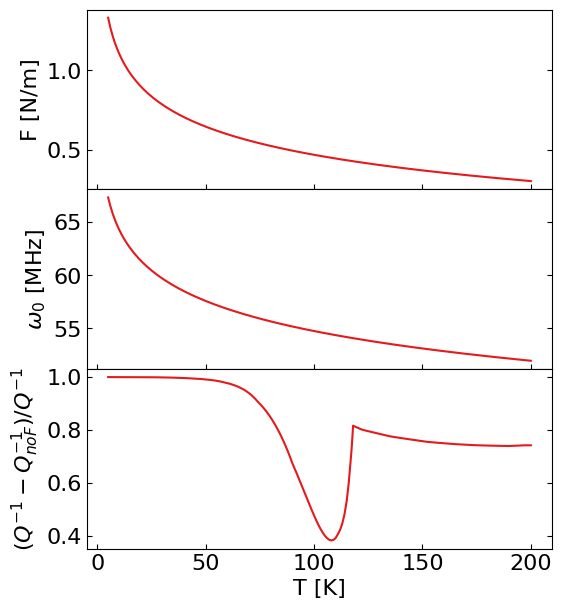

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(6,7), sharex=True)
ax[0].plot(T, tension)
ax[0].set_ylabel('F [N/m]')
ax[1].plot(T, omega*10**(-6))
#ax[1].set_ylim(45,75)
ax[1].set_ylabel('$\omega_0$ [MHz]')
ax[2].plot(T,(Q-Q_z)/Q)
ax[2].set_ylabel(r'$(Q^{-1}-Q^{-1}_{noF})/Q^{-1}$')
ax[2].set_xlabel('T [K]')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
tension = np.array([D/a**2]*len(T))
tension = D/a**2*((1/T**0.1)*50)-2
#tension = D/a**2*alpha*10**5
Q, omega = dis.dissipation_tau_z_tension_w(h, a, nu, E, rho, T, c_V, kappa, alpha, tension)

TypeError: alpha_beta() takes 3 positional arguments but 4 were given

NameError: name 'omega' is not defined

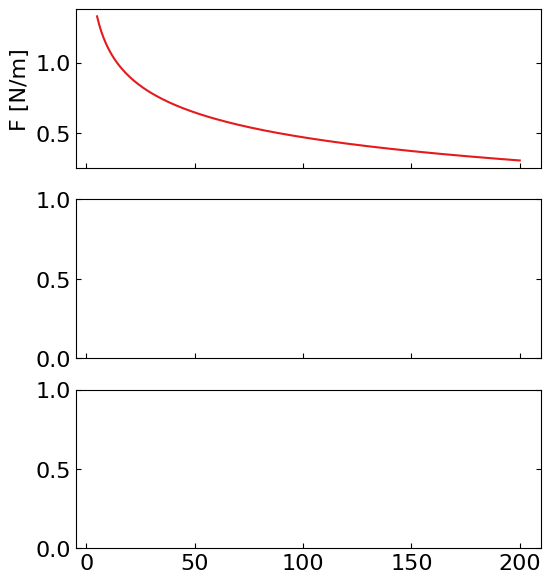

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(6,7), sharex=True)
ax[0].plot(T, tension)
ax[0].set_ylabel('F [N/m]')
ax[1].plot(T, omega*10**(-6))
#ax[1].set_ylim(45,75)
ax[1].set_ylabel('$\omega_0$ [MHz]')
ax[2].plot(T,(Q-Q_z)/Q)
ax[2].set_ylabel(r'$(Q^{-1}-Q^{-1}_{noF})/Q^{-1}$')
ax[2].set_xlabel('T [K]')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

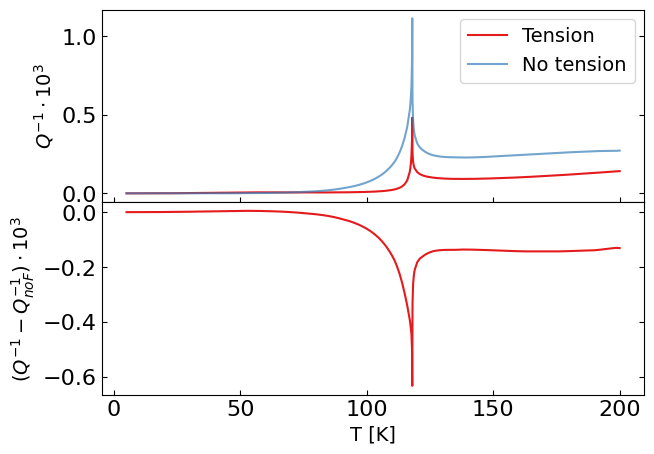

In [ ]:
fs = 14
fig, ax = plt.subplots(2,1, figsize=(7,5), sharex=True)
ax[0].plot(T,Q*1000, label='Tension')
ax[0].plot(T,Q_z*1000,alpha=0.7, label='No tension')
ax[0].set_ylabel('$Q^{-1} \cdot 10^3$', fontsize=fs)
ax[0].legend(fontsize=fs)
ax[1].plot(T,(Q-Q_z)*1000)
ax[1].set_ylabel('$(Q^{-1}-Q^{-1}_{noF}) \cdot 10^3$', fontsize=fs)
ax[1].set_xlabel('T [K]', fontsize=fs)
#ax[1].set_ylim(-0.005, 0.045)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

## Thermal time constants

## need also to plot everything taking experimental data!

In [ ]:
data_f = np.genfromtxt(r"C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\data\FePS3\res_freq_feps3.csv", delimiter=' ')
T_data_f = data_f[:, 0]
freq_data_f = data_f[:, 1]*10**6
f0 = np.interp(T, T_data_f, freq_data_f)
w0 = 2*np.pi*f0
r = 5*10**-6
r1 = 1.5*10**(-6)
r2 = 2*10**(-6)
r3 = 2.5*10**(-6)
mu = 5
nu = 0.304
E = 103*10**9
t_gabriele = 40*10**-9
w0_1 = w0*r**2/r1**2
w0_2 = w0*r**2/r2**2
w0_3 = w0*r**2/r3**2

kappa = (k_mag_vec[-1] + k_ph_vec [1])
kappa = kappa_fe_exp
Xi_1 = t_gabriele * np.sqrt(w0_1*rho*c_V/(2*kappa))
Xi_2 = t_gabriele * np.sqrt(w0_2*rho*c_V/(2*kappa))
Xi_3 = t_gabriele * np.sqrt(w0_3*rho*c_V/(2*kappa))

factor1 = (1 + nu) / (1 - nu) * E * alpha ** 2 * T / (rho * c_v_)

if max(Xi_1)<50:
    factor2_1 = 6/Xi_1**2 - 6/Xi_1**3*(np.sinh(Xi_1)+np.sin(Xi_1))/(np.cosh(Xi_1) + np.cos(Xi_1))
    factor2_2 = 6/Xi_2**2 - 6/Xi_2**3*(np.sinh(Xi_2)+np.sin(Xi_2))/(np.cosh(Xi_2) + np.cos(Xi_2))
    factor2_3 = 6/Xi_3**2 - 6/Xi_3**3*(np.sinh(Xi_3)+np.sin(Xi_3))/(np.cosh(Xi_3) + np.cos(Xi_3))
else: # approximation of the sinh and cosh if Xi values are too high.
    factor2_1 = 6/Xi_1**2 - 6/Xi_1**3
    factor2_2 = 6/Xi_2**2 - 6/Xi_2**3
    factor2_3 = 6/Xi_3**2 - 6/Xi_3**3


Q_1 = factor1*factor2_1
Q_2 = factor1*factor2_2
Q_3 = factor1*factor2_3

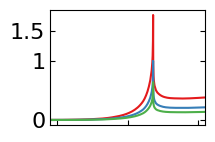

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(2,1.5))
ax.plot(T, Q_1*1000, label='$r=1.5$ $\mu m$')
ax.plot(T, Q_2*1000, label='$r=2$ $\mu m$')
ax.plot(T, Q_3*1000, label='$r=2.5$ $\mu m$')
ax.set_xlim(45,155)
ax.tick_params(direction='in')
ax.set_yticks([0,1,1.5],labels=['0','1','1.5'])
ax.set_xticks([50,100,150],labels=['','',''])
plt.savefig(r'C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\plots\FePS3\fig5\QZ_gabriele.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
data_f = np.genfromtxt(r"C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\data\FePS3\res_freq_feps3.csv", delimiter=' ')
T_data_f = data_f[:, 0]
freq_data_f = data_f[:, 1]*10**6
f0 = np.interp(T, T_data_f, freq_data_f)
w0 = 2*np.pi*f0

rho_ = 3375
c_v_ = c_V * (1000/183)
kappa = k_mag_vec[-1] + k_ph_vec[1]

Q1 = dis.dissipation_kz_kr(t_gabriele, r1, nu, E, rho_, T, c_v_, kappa, alpha, w0_1, 200)
Q2 = dis.dissipation_kz_kr(t_gabriele, r2, nu, E, rho_, T, c_v_, kappa, alpha, w0_2, 200)
Q3 = dis.dissipation_kz_kr(t_gabriele, r3, nu, E, rho_, T, c_v_, kappa, alpha, w0_3, 200)



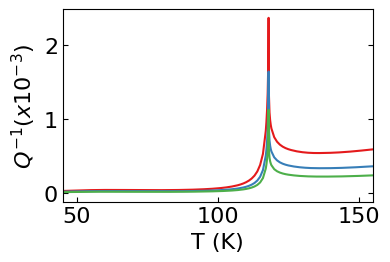

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(4,2.5))
ax.plot(T, Q1*1000)
ax.plot(T, Q2*1000)
ax.plot(T, Q3*1000)
ax.set_xlim(45,155)
ax.set_xlabel('T (K)')
ax.set_ylabel(r'$Q^{-1} (x10^{-3})$')
plt.savefig(r'C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\plots\FePS3\fig5\QRZgabrielle.pdf', bbox_inches = 'tight')

plt.show()

# Analysis of the radius dependence of the dissipation

In [ ]:
T1 = np.linspace(5, 116, num=117-5).astype(int)
T2 = np.linspace(117, 117.9, num=5)
T3 = np.linspace(118.1, 119, num=5)
T4 = np.linspace(120, 200, num=201-120).astype(int)
T = np.concatenate((T1, T2, np.array([TN_feps]), T3, T4))
data_f = np.genfromtxt(r"C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\data\FePS3\res_freq_feps3.csv", delimiter=' ')
T_data_f = data_f[:, 0]
freq_data_f = data_f[:, 1]*10**6
f0 = np.interp(T, T_data_f, freq_data_f)
w0 = 2*np.pi*f0

r=5*10**-6
rho_ = 3375
c_v_ = c_V * (1000/183)
kappa = k_mag_vec[2] + k_ph_vec[1]
data_kappa_fe = np.genfromtxt(r"C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\data\FePS3\kappa_feps3.csv", delimiter=' ')
T_k_fe = data_kappa_fe[:, 0]
k_fe = data_kappa_fe[:, 1]
kappa_fe = np.interp(T,T_k_fe,k_fe)
thickness = 45*10**-9
r_x = np.logspace(-7.5, -4.5, 200)
Qs = []
for radius in r_x:
    print(radius)
    w_x = w0*r**2/radius**2
    Q_x = dis.dissipation_kz_kr(thickness, radius, nu, E, rho_, T, c_v_, kappa_fe, alpha, w_x, 300)
    Q = {'r':radius, 'T':T, 'Q':Q_x}
    Q = pd.DataFrame(Q)
    Qs.append(Q_x)

df_Q2 = pd.DataFrame(Qs, columns=T, index=r_x)

3.162277660168379e-08


c:\Users\alvar\PycharmProjects\nanomechanical_magnetic_resonators\Theory\dissipation.py:95: RuntimeWarning: overflow encountered in scalar multiply
  denominator_n = (l_n**2 + m_n**2)**3 * (c1_n**2+c2_n**2) * sp.jv(1,x0_n)**2
c:\Users\alvar\PycharmProjects\nanomechanical_magnetic_resonators\Theory\dissipation.py:94: RuntimeWarning: overflow encountered in scalar multiply
  numerator_n = (d1_n + d2_n - (l_n**4-m_n**4)*(c1_n**2+c2_n**2)*h**3/12) * integral**2
c:\Users\alvar\PycharmProjects\nanomechanical_magnetic_resonators\Theory\dissipation.py:96: RuntimeWarning: invalid value encountered in scalar divide
  sum_n = numerator_n / denominator_n
c:\Users\alvar\PycharmProjects\nanomechanical_magnetic_resonators\Theory\dissipation.py:84: RuntimeWarning: overflow encountered in scalar multiply
  d1_n = (l_n ** 3 - 3 * l_n * m_n ** 2) * (l_n * h / (l_n ** 2 + m_n ** 2) * (c1_n ** 2 + c2_n ** 2) +
c:\Users\alvar\PycharmProjects\nanomechanical_magnetic_resonators\Theory\dissipation.py:94: Runti

3.2739751361382184e-08


c:\Users\alvar\PycharmProjects\nanomechanical_magnetic_resonators\Theory\dissipation.py:84: RuntimeWarning: overflow encountered in scalar add
  d1_n = (l_n ** 3 - 3 * l_n * m_n ** 2) * (l_n * h / (l_n ** 2 + m_n ** 2) * (c1_n ** 2 + c2_n ** 2) +
c:\Users\alvar\PycharmProjects\nanomechanical_magnetic_resonators\Theory\dissipation.py:86: RuntimeWarning: overflow encountered in scalar add
  2 * (l_n ** 2 - m_n ** 2) / (l_n ** 2 + m_n ** 2) ** 2 * (c1_n * c4_n + c2_n * c3_n))
c:\Users\alvar\PycharmProjects\nanomechanical_magnetic_resonators\Theory\dissipation.py:87: RuntimeWarning: overflow encountered in scalar add
  d2_n = (3 * l_n ** 2 * m_n - m_n ** 3) * (-m_n * h / (l_n ** 2 + m_n ** 2) * (c1_n ** 2 + c2_n ** 2) +
c:\Users\alvar\PycharmProjects\nanomechanical_magnetic_resonators\Theory\dissipation.py:88: RuntimeWarning: overflow encountered in scalar add
  4 * l_n * m_n / (l_n ** 2 + m_n ** 2) ** 2 * (c1_n * c4_n + c2_n * c3_n) +
c:\Users\alvar\PycharmProjects\nanomechanical_magnetic

3.3896179728507914e-08
3.5093455277199855e-08
3.6333020805204414e-08
3.7616370072543935e-08
3.8945049601597946e-08
4.032066054076735e-08
4.17448605939659e-08
4.3219366018265295e-08
4.47459536921003e-08
4.6326463256527594e-08
4.796279933211698e-08
4.9656933814147285e-08
5.141090824887363e-08
5.322683629372798e-08
5.5106906264418985e-08
5.705338377199951e-08
5.906861445308131e-08
6.115502679648502e-08
6.331513506973246e-08
6.555154234890919e-08
6.786694365554642e-08
7.026412920430313e-08
7.274598776536365e-08
7.531551014560009e-08
7.797579279269578e-08
8.073004152657436e-08
8.358157540262826e-08
8.653383071140461e-08
8.959036511956615e-08
9.275486195712056e-08
9.603113465608089e-08
9.942313134590756e-08
1.0293493961127168e-07
1.0657079141786942e-07
1.1033506821222626e-07
1.1423230620163464e-07
1.1826720182059081e-07
1.2244461739031434e-07
1.2676958697817228e-07
1.3124732246407102e-07
1.3588321982112237e-07
1.4068286561815398e-07
1.4565204375190303e-07
1.507967424170009e-07
1.561231613221

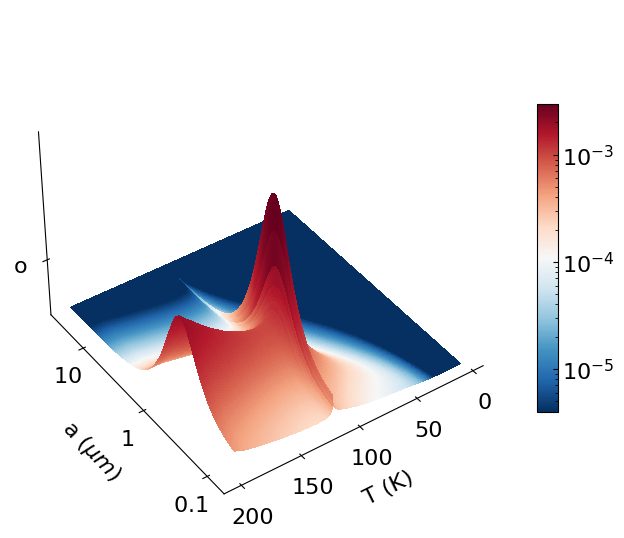

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, dpi=100, figsize=(8,8))

# Make data.
X, Y = np.meshgrid(r_x, T)
# Plot the surface.
surf = ax.plot_surface(Y, np.log10(X), (np.array(Qs)).T, cmap='RdBu_r',
                       linewidth=0, antialiased=False,rcount=500, ccount=500, norm=pltc.LogNorm(4*10**(-6),0.003))
ax.view_init(azim=-65+120, elev=40)

y_ticks = [-7, -6, -5]  # Define the tick positions
y_tick_labels = ['$0.1$', '$1$', '$10$']
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)
ax.set_ylim(-7.2,-4.5)
ax.set_xlabel('T (K)', labelpad=10)
ax.set_ylabel('a $(\mu m)$', labelpad=10)
ax.invert_yaxis()


z_ticks = [0.001]  # Define the tick positions
z_tick_labels = ['o']
ax.set_zticks(z_ticks)
ax.set_zticklabels(z_tick_labels)

ax.grid(False)
fig.colorbar(surf, shrink=0.5, aspect=15)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

plt.savefig(r'C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\plots\FePS3\radius_depQ.pdf',transparent=True)
plt.show()

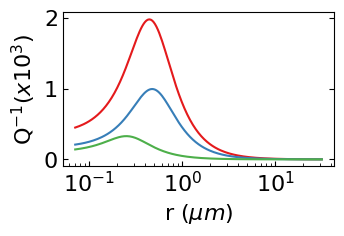

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(3.5,2))
ax.plot(r_x*10**6, 1000*np.array(Qs)[:,-1])
ax.plot(r_x*10**6, 1000*np.array(Qs)[:,-71])
ax.plot(r_x*10**6, 1000*np.array(Qs)[:,-119])
ax.set_xscale('log')
ax.set_xlabel('r $(\mu m)$')
ax.set_ylabel('Q$^{-1} (x10^3)$')
plt.savefig(r'C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\plots\FePS3\radius_depQ_traces.pdf', bbox_inches = 'tight', transparent=True)
plt.show()

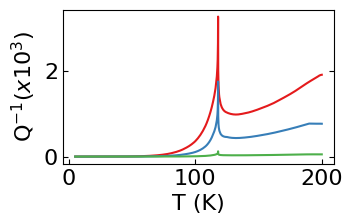

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(3.5,2))
ax.plot(T, 1000*np.array(Qs)[-120,:])
ax.plot(T, 1000*np.array(Qs)[-100,:])
ax.plot(T, 1000*np.array(Qs)[-60,:])
ax.set_xlabel('T (K)')
ax.set_ylabel('Q$^{-1} (x10^3)$')
plt.savefig(r'C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\plots\FePS3\temp_depQ_traces.pdf', bbox_inches = 'tight', transparent=True)
plt.show()

In [ ]:
print(r_x[-60])
print(r_x[-100])
print(r_x[-120])
a

4.078991157230091e-06
1.0175076625242984e-06
5.081947225899414e-07


4.9999999999999996e-06

## Radius dependence but for anisotropic kappa

In [ ]:
T1 = np.linspace(5, 116, num=117-5).astype(int)
T2 = np.linspace(117, 117.9, num=5)
T3 = np.linspace(118.1, 119, num=5)
T4 = np.linspace(120, 200, num=201-120).astype(int)
T = np.concatenate((T1, T2, np.array([TN_feps]), T3, T4))
data_f = np.genfromtxt(r"C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\data\FePS3\res_freq_feps3.csv", delimiter=' ')
T_data_f = data_f[:, 0]
freq_data_f = data_f[:, 1]*10**6
f0 = np.interp(T, T_data_f, freq_data_f)
w0 = 2*np.pi*f0

r=5*10**-6
rho_ = 3375
c_v_ = c_V * (1000/183)
kappa = k_mag_vec[2] + k_ph_vec[1]
data_kappa_fe = np.genfromtxt(r"C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\data\FePS3\kappa_feps3.csv", delimiter=' ')
T_k_fe = data_kappa_fe[:, 0]
k_fe = data_kappa_fe[:, 1]
kappa_fe = np.interp(T,T_k_fe,k_fe)
kappa_r = kappa_fe*(2.7/1.35)
kappa_z = kappa_fe*(0.85/1.35)
thickness = 45*10**-9
r_x = np.logspace(-8.035,-3.035,200)
Q_RZ_ANIS = []
for radius in r_x:
    print(radius)
    w_x = w0*r**2/radius**2
    Q_x = dis.dissipation_kz_kr_anis(thickness, radius, nu, E, rho_, T, c_v_, kappa_r, kappa_z, alpha, w_x,200)
    Q = {'r':radius, 'T':T, 'Q':Q_x}
    Q = pd.DataFrame(Q)
    Q_RZ_ANIS.append(Q_x)

9.225714271547628e-09
9.775199467525055e-09
1.0357412100285313e-08
1.0974301421830466e-08
1.1627932781961272e-08
1.2320494543082965e-08
1.3054305406857862e-08
1.3831822177235082e-08
1.4655647985847291e-08
1.5528541007314003e-08
1.645342369362942e-08
1.7433392558552578e-08
1.8471728544757005e-08
1.9571908008450208e-08
2.073761435823849e-08
2.1972750387205257e-08
2.3281451339489482e-08
2.4668098755112592e-08
2.6137335139405005e-08
2.7694079506147127e-08
2.9343543846461767e-08
3.109125057859765e-08
3.2943051037024166e-08
3.490514506274101e-08
3.698410176038902e-08
3.9186881491659424e-08
4.15208591786333e-08
4.399384899507339e-08
4.661413052833228e-08
4.939047649946999e-08
5.2332182134385245e-08
5.544909628429813e-08
5.8751654399772656e-08
6.225091346867971e-08
6.595858903506957e-08
6.988709442289697e-08
7.40495822959163e-08
7.845998869289374e-08
8.313307968556212e-08
8.808450081553462e-08
9.333082947568708e-08
9.888963041138769e-08
1.0477951452738703e-07
1.1102020119725986e-07
1.176325842

In [ ]:
np.logspace(-8.035,-4.035,10)

array([9.22571427e-09, 2.56710980e-08, 7.14313551e-08, 1.98761989e-07,
       5.53067040e-07, 1.53894189e-06, 4.28219723e-06, 1.19154682e-05,
       3.31554980e-05, 9.22571427e-05])

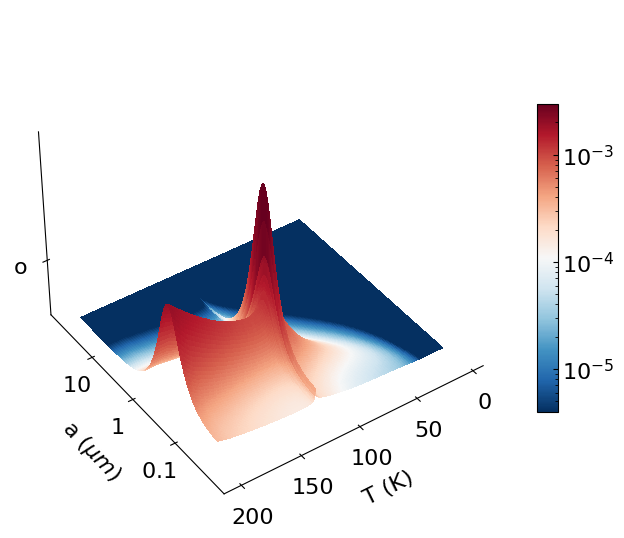

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, dpi=100, figsize=(8,8))
start = -50
# Make data.
X, Y = np.meshgrid(r_x[:start], T)
# Plot the surface.
surf = ax.plot_surface(Y, np.log10(X), (np.array(Q_RZ_ANIS)[:start,:]).T, cmap='RdBu_r',
                       linewidth=0, antialiased=False,rcount=500, ccount=500, norm=pltc.LogNorm(4*10**(-6),0.003))
ax.view_init(azim=-65+120, elev=40)


ax.set_ylim(-8.035,-4.035)
y_ticks = [-7, -6, -5]  # Define the tick positions
y_tick_labels = ['$0.1$', '$1$', '$10$']
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)
ax.set_xlabel('T (K)', labelpad=10)
ax.set_ylabel('a $(\mu m)$', labelpad=10)
ax.invert_yaxis()


z_ticks = [0.001]  # Define the tick positions
z_tick_labels = ['o']
ax.set_zticks(z_ticks)
ax.set_zticklabels(z_tick_labels)

ax.grid(False)
fig.colorbar(surf, shrink=0.5, aspect=15)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

plt.savefig(r'C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\plots\FePS3\anis_radius_depQ.pdf',transparent=True)
plt.show()

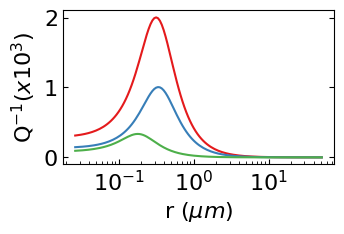

200.0 130.0 90.0


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(3.5,2))
ax.plot(r_x[:start]*10**6, 1000*np.array(Q_RZ_ANIS)[:start,-1])
ax.plot(r_x[:start]*10**6, 1000*np.array(Q_RZ_ANIS)[:start,-71])
ax.plot(r_x[:start]*10**6, 1000*np.array(Q_RZ_ANIS)[:start,-119])
ax.set_xscale('log')
ax.set_xlabel('r $(\mu m)$')
ax.set_ylabel('Q$^{-1} (x10^3)$')
plt.savefig(r'C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\plots\FePS3\anisradius_depQ_traces.pdf', bbox_inches = 'tight', transparent=True)
plt.show()
print(T[-1],T[-71],T[-119])


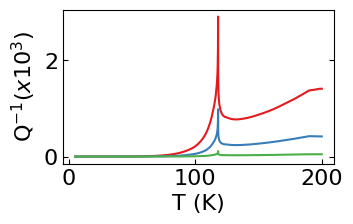

0.49965281865614153 1.0004050592920313 3.0030517350650268


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(3.5,2))
ax.plot(T, 1000*np.array(Q_RZ_ANIS)[-131,:])
ax.plot(T, 1000*np.array(Q_RZ_ANIS)[-119,:])
ax.plot(T, 1000*np.array(Q_RZ_ANIS)[-100,:])
ax.set_xlabel('T (K)')
ax.set_ylabel('Q$^{-1} (x10^3)$')
plt.savefig(r'C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\plots\FePS3\anis_temp_depQ_traces.pdf', bbox_inches = 'tight', transparent=True)
plt.show()
print(r_x[-131]/10**-6,r_x[-119]/10**-6,r_x[-100]/10**-6)

# Thickness dependence

In [ ]:
data_f = np.genfromtxt(r"C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\data\FePS3\res_freq_feps3.csv", delimiter=' ')
T_data_f = data_f[:, 0]
freq_data_f = data_f[:, 1]*10**6
f0 = np.interp(T, T_data_f, freq_data_f)
w0 = 2*np.pi*f0

rho_ = 3375
c_v_ = c_V * (1000/183)
#kappa = k_mag_vec[i] + k_ph_vec[1]
kappa_2D = kappa*45*10**-9
r = 5*10**(-6)
t_x = np.logspace(-9.1, -5.9, 200)
kappa_3D = kappa_fe_exp
Qs_t = []
Qs_tk = []
for thick in t_x:
    Q_x = dis.dissipation_kz_kr(thick, r, nu, E, rho_, T, c_v_, kappa_3D, alpha, w0, 200)
    Qs_t.append(Q_x)
    #Q_xk = dis.dissipation_kz_kr(thick, r, nu, E, rho_, T, c_v_, kappa_2D/thick, alpha, w0, 200)
    #Qs_tk.append(Q_xk)
    print('\r'+ str(thick), end=' ')

1.2589254117941661e-06 

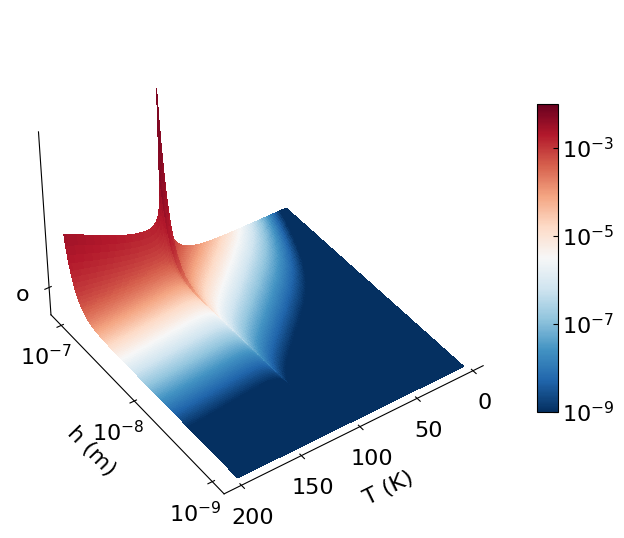

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, dpi=100, figsize=(8,8))
# Make data.
X, Y = np.meshgrid(t_x[:140], T)
# Plot the surface.
surf = ax.plot_surface(Y, np.log10(X),(np.array(Qs_t[:][:140])).T, cmap='RdBu_r',
                       linewidth=0, antialiased=False, rcount=600, ccount=600, norm=pltc.LogNorm(vmin=10**(-9), vmax=0.01))
ax.view_init(azim=-65+120, elev=40)

y_ticks = [-9,-8,-7]  # Define the tick positions
y_tick_labels = ['$10^{-9}$','$10^{-8}$','$10^{-7}$']
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)
ax.set_ylim(-9.1,-6.9)

z_ticks = [0.001]  # Define the tick positions
z_tick_labels = ['o']
ax.set_zticks(z_ticks)
ax.set_zticklabels(z_tick_labels)

ax.set_xlabel('T (K)', labelpad=10)
ax.set_ylabel('h (m)', labelpad=10)

ax.invert_yaxis()

ax.grid(False)
colorbar=fig.colorbar(surf, shrink=0.5, aspect=15)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.savefig(r'C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\plots\FePS3\thickness_depQ.pdf')
plt.show()

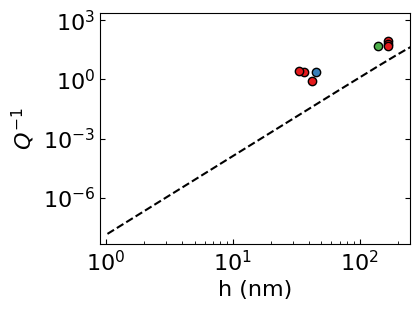

In [ ]:
diss = [0.85,2.3,2.65,85.5,62,51]
thicknesses = [41.8, 36.5, 33.5, 168,168,168]
diss_mak = [2.4]
thick_mak = [45]
diss2 = [50]
thick2=[139]
fig, ax = plt.subplots(1,1, figsize=(4,3))
ax.scatter(thicknesses, diss, edgecolor='k')
ax.scatter(thick_mak, diss_mak, edgecolor='k')
ax.scatter(thick2, diss2, edgecolor='k')
ax.plot(t_x[7:]*10**9, 1000*np.array(Qs_t)[7:,115], linestyle='dashed',c='k')
ax.set_xlim(0.9,250)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('h (nm)')
ax.set_ylabel('$Q^{-1}$')
plt.savefig(r'C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\plots\FePS3\fig6\maxQ_thick.pdf', bbox_inches ='tight')
plt.show()

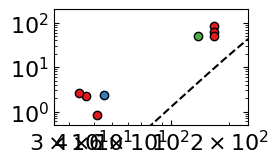

In [ ]:
diss = [0.85,2.3,2.65,85.5,62,51]
thicknesses = [41.8, 36.5, 33.5, 168,168,168]
diss_mak = [2.4]
thick_mak = [45]
diss2 = [50]
thick2=[139]
fig, ax = plt.subplots(1,1, figsize=(2.5,1.5))
ax.scatter(thicknesses, diss, edgecolor='k')
ax.scatter(thick_mak, diss_mak, edgecolor='k')
ax.scatter(thick2, diss2, edgecolor='k')
ax.plot(t_x[7:]*10**9, 1000*np.array(Qs_t)[7:,115],linestyle='dashed',c='k')
ax.set_xlim(25,250)
ax.set_ylim(0.5,200)
ax.set_xscale('log')
ax.set_yscale('log')
plt.savefig(r'C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\plots\FePS3\fig6\maxQ_thickZOOM.pdf', bbox_inches ='tight')
plt.show()

In [ ]:

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('r (m)')
ax.set_ylabel('Q$^{-1} (x10^3)$')
plt.savefig(r'C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\plots\FePS3\radius_depQ_traces.pdf', bbox_inches = 'tight')
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
T[115]

117.67500000000001

ValueError: Argument Z must be 2-dimensional.

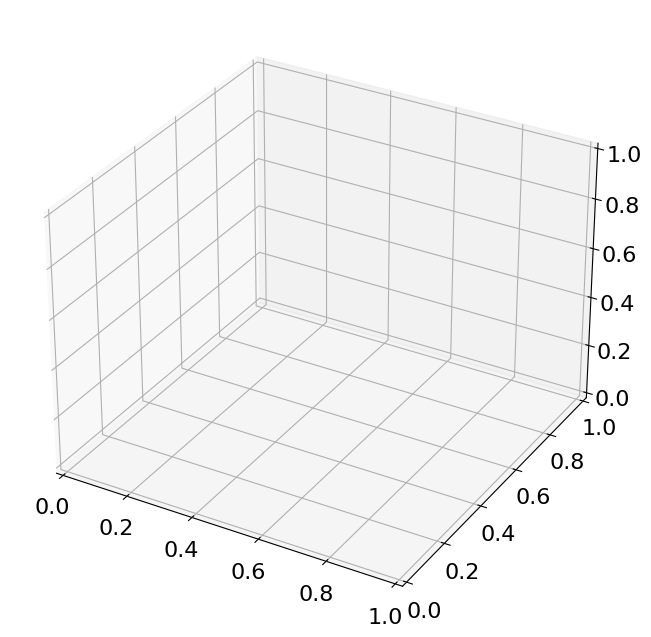

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, dpi=100, figsize=(8,8))
# Make data.
X, Y = np.meshgrid(t_x, T)
# Plot the surface.
surf = ax.plot_surface(Y, np.log10(X),(np.array(Qs_tk)).T, cmap='RdBu_r',
                       linewidth=0, antialiased=False, rcount=600, ccount=600, norm=pltc.LogNorm(vmin=10**(-10), vmax=0.05))
ax.view_init(azim=-65+120, elev=40)

y_ticks = [-9,-8,-7, -6]  # Define the tick positions
y_tick_labels = ['$10^{-9}$','$10^{-8}$','$10^{-7}$', '$10^{-6}$']
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)

z_ticks = [0.01]  # Define the tick positions
z_tick_labels = ['o']
ax.set_zticks(z_ticks)
ax.set_zticklabels(z_tick_labels)

ax.set_xlabel('T [K]', labelpad=10)
ax.set_ylabel('Thickness [m]', labelpad=10)

ax.invert_yaxis()

ax.grid(False)
colorbar=fig.colorbar(surf, shrink=0.5, aspect=15)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.savefig(r'C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\plots\FePS3\thickness_depQ2.pdf')
plt.show()

In [ ]:
# dont konw what this is as of now
k_e = 1
cv_e = 700
fac_e = np.sqrt(2/np.pi)

def eff_r(a,h):
    #xi = 10**4*np.sqrt(np.ones_like(a)*np.sqrt(10**9*h*2))
    xi = np.ones_like(a)*fac_e*np.sqrt(np.sqrt(E*h**2*rho_/(12*(1-nu**2)))*(np.pi*cv_e/k_e))
    f = []
    for i in xi:
        if i>10:
            f.append(6/i**2 - 6/i**3)
        else:
            f.append(6/i**2 - 6/i**3*(np.sinh(i)+np.sin(i))/(np.cosh(i) + np.cos(i)))
    return f

def eff_z(a,h):
    xi = fac_e*np.sqrt(np.sqrt(E*h**6*rho_/(12*(1-nu**2)))*(cv_e/(np.pi*k_e*a**2)))
    #xi = 10**4*np.sqrt(np.sqrt(10**9*h**6)/a**2)
    f = []
    for i in xi:
        if i>10:
            f.append(6/i**2 - 6/i**3)
        else:
            f.append(6/i**2 - 6/i**3*(np.sinh(i)+np.sin(i))/(np.cosh(i) + np.cos(i)))
    return f

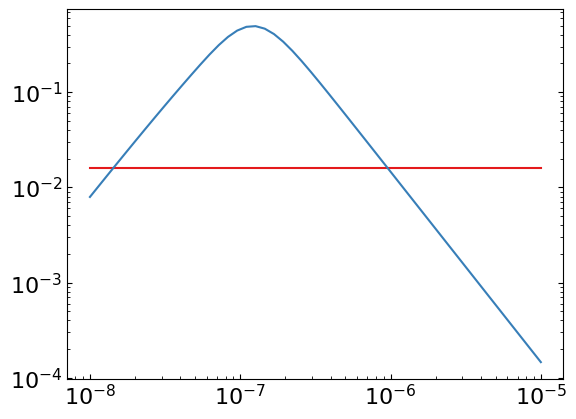

In [ ]:
a = np.logspace(-8, -5)
h = 45*10**-9
plt.plot(a, eff_r(a,h))
plt.plot(a, eff_z(a,h))
plt.xscale('log')
plt.yscale('log')

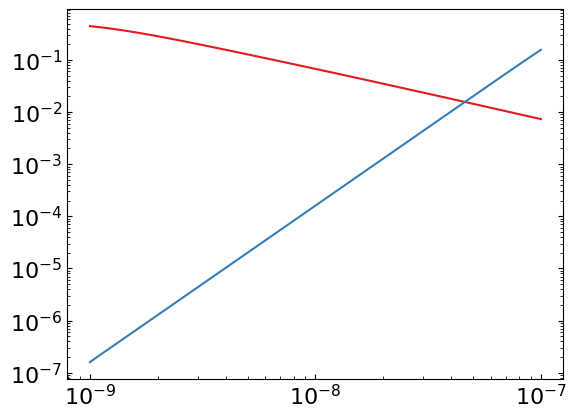

In [ ]:
a = 10**-6
h = np.logspace(-9,-7)
plt.plot(h, eff_r(a,h))
plt.plot(h, eff_z(a,h))
plt.xscale('log')
plt.yscale('log')

In [ ]:
t_gab = 30*10**-9
a1 = 1.5*10**-6
a2 = 2.0*10**-6
a3 = 2.5*10**-6
pret_gab = 7
tension_gab = tension_thick(integral_alpha, t_gab, E, nu)

omega_gab_1 = omega_tension_pl(t_gab, a1, nu, E, rho_, tension_gab + pret_gab)
omega_gab_2 = omega_tension_pl(t_gab, a2, nu, E, rho_, tension_gab + pret_gab)
omega_gab_3 = omega_tension_pl(t_gab, a3, nu, E, rho_, tension_gab + pret_gab)

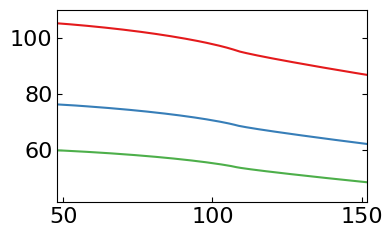

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(4,2.5))
ax.plot(T_integrate-10,omega_gab_1*10**-6/(2*np.pi))
ax.plot(T_integrate-10,omega_gab_2*10**-6/(2*np.pi))
ax.plot(T_integrate-10,omega_gab_3*10**-6/(2*np.pi))
ax.set_xlim(48,152)
plt.show()